<a href="https://colab.research.google.com/github/dldisha/TSS21/blob/main/HW1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: N16644034
-   **Name**: Disha Lamba

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

The data shows how users’ mobility patterns - what types of places they
spend time in - varied over the course of the COVID-19 pandemic.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

When you are finished, make sure you have run all of the cells in the
notebook (in order), and then create a PDF from it. Submit the PDF on
Gradescope.

**Important note**: You won’t necessarily have learned or seen in
advance how to use all the Python commands and library functions you
need to complete this assignment. That’s OK. Part of the learning
objective here is to practice finding and applying that kind of new
information as you go! Use the library documentation, search the
Internet, or ask questions on Ed if you need any help.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
# TODO Q1
url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [ ]:
# TODO Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809045 entries, 0 to 5809044
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

In [ ]:
# TODO Q3
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [ ]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])
df[['date']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809045 entries, 0 to 5809044
Data columns (total 1 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 44.3 MB


Next, you are going to extract the subset of data for the U.S. state of
your choice. You can choose any location *except* New York.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single U.S. state (but *not* New York).

In [ ]:
# TODO Q5
df_subset = df[(df['country_region'].eq("United States")) & (df["sub_region_1"]).eq("Florida")]
df_subset.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4631533,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-15,2.0,0.0,9.0,2.0,-1.0,-1.0
4631534,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-16,4.0,1.0,8.0,2.0,-2.0,0.0
4631535,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-17,5.0,1.0,24.0,0.0,-19.0,4.0
4631536,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-18,3.0,2.0,13.0,6.0,1.0,0.0
4631537,US,United States,Florida,NaN,NaN,US-FL,NaN,ChIJvypWkWV2wYgR0E7HW9MTLvc,2020-02-19,3.0,0.0,15.0,5.0,2.0,0.0


Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

Also check whether there are any missing rows of data. What date range
is represented in this data? Is every day within that range included in
the data?

In [ ]:
# TODO Q6

#checking for missing data in '...percent_change_from_baseline' fields
print(df_subset[['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline']].isnull().sum())

#check for missing rows of data
print("\n Missing rows of data: \n", df_subset.isna().any())

#check for date range and missing dates
min_date = df_subset.date.min()
max_date = df_subset.date.max()
print("\n Min date:", min_date)
print("Max date:", max_date)
expected_range = pd.date_range(start = min_date, end = max_date, freq = 'D')
print("\n Range is:", expected_range)
missing_dates = expected_range.difference(df_subset['date'])
print("\n Missing dates are:", missing_dates)


retail_and_recreation_percent_change_from_baseline     5582
grocery_and_pharmacy_percent_change_from_baseline      5626
parks_percent_change_from_baseline                     9324
transit_stations_percent_change_from_baseline         12223
workplaces_percent_change_from_baseline                 469
residential_percent_change_from_baseline               7637
dtype: int64

 Missing rows of data: 
 country_region_code                                   False
country_region                                        False
sub_region_1                                          False
sub_region_2                                           True
metro_area                                             True
iso_3166_2_code                                        True
census_fips_code                                       True
place_id                                              False
date                                                  False
retail_and_recreation_percent_change_from_baseline     True
g

**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? (Even if, for
the U.S. state you have chosen, the data is complete, explain why some
data may be missing for other regions.)

**Include a short quote from the material you read in the “Learn about
the data” section to answer this question. Indicate that it is a quote
using quotation marks or a block quote, and cite the source, including a
URL.**

**Ans:**
Yes, some relevant data is missing like some sub-regions only or for some regions the pipeline change from baseline fields are missing in the Covid-19 Community Mobility project dataset. 
Some relevent data could be missing because of the following reasons:

1. Disagreement to provide data

2. The data isn't enough for some particular states like for the states like Guan, Wyoming maybe because of less population.

3. Loss of information 

4. Servers go down

5. "Data could only be collected from users who have turned on their location history setting" as per [Privacy Policy](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en) which is by default off. Therefore, missing values are dependent on other varaibles like user connectivity and location history setting.

6. "Some users might have deleted the location history data directly from their timeline" as per [Privavcy Policy](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en) which results in not having enough data for some dates to ensure anonymity. 

7. "Data depends on user settings, connectivity, and whether it meets the quality and privacy threshold" - [About this data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data). Some areas are remote which do not have Internet connectivity all the time, therefore loss of information and which further doesn't result in qualtiy data to draw conclusions. 

8. Users might not have taken there mobile device with them when they visited a grocery shop, park or for a leisure activity.

9. People using Apple maps instead of Google maps




To track trends in cases and vaccinations alongside mobility trends, we
can also read in data from several other sources. For example,

-   Our World in Data distributes data about COVID-19 vaccination status
    over time for U.S. states in their [Github
    repository](https://github.com/owid/covid-19-data).
-   The New York Times distributes data about COVID-19 cumulative cases
    over time for U.S. states in their [Github
    repository](https://github.com/nytimes/covid-19-data).

You can choose whether to look at vaccination trends or case trends for
the U.S. state you have selected. Use one of the following cells to read
in the data, convert the `date` field to a `datetime`, and get the
subset of the data that applies to the specific U.S. state for which you
are exploring mobility data.

Then, use `pandas` functions to check your new data frame and look at
the first few rows of data.

In [ ]:
# TODO Q8 - Vaccinations option

#Reading the data
url_vax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
df_vax = pd.read_csv(url_vax)

#converting the data field to a datetime field
df_vax['date'] = pd.to_datetime(df['date'])
df_vax[['date']].info()

#particular state subset
df_vax_subset = df_vax[(df_vax['location'].eq("Florida"))]
df_vax_subset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10423 entries, 0 to 10422
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10423 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 81.6 KB


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
2080,2020-06-18,Florida,633440.0,1676300.0,586741.0,0.19,2.95,41725.0,2.73,7.80,NaN,NaN,NaN,0.378
2081,2020-06-19,Florida,705398.0,1680200.0,647330.0,0.25,3.28,52969.0,3.01,7.82,71958.0,71958.0,3350.0,0.420
2082,2020-06-20,Florida,774485.0,1970875.0,709002.0,NaN,3.61,NaN,3.30,9.18,69087.0,70522.0,3283.0,0.393
2083,2020-06-21,Florida,853081.0,2069175.0,776430.0,0.35,3.97,74776.0,3.62,9.63,78596.0,73214.0,3409.0,0.412
2084,2020-06-22,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80401.0,75010.0,3492.0,NaN


In [ ]:
# TODO Q8 - Cases option

url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
# df_cases = ...
# df_cases['date'] = ...
# df_cases_subset = ...
# check the data frame and look at a few rows

Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen, alongside either
vaccination trends or cases trends.

In the following cell, create a figure with seven subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the date.
On the vertical axes, show (as a line):

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the next subplot
-   either COVID-19 cases or vaccinations in the bottom subplot

Make sure to clearly label each axis. Use `matplotlib` library
documentation to adjust your figures and make your plot look nice!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

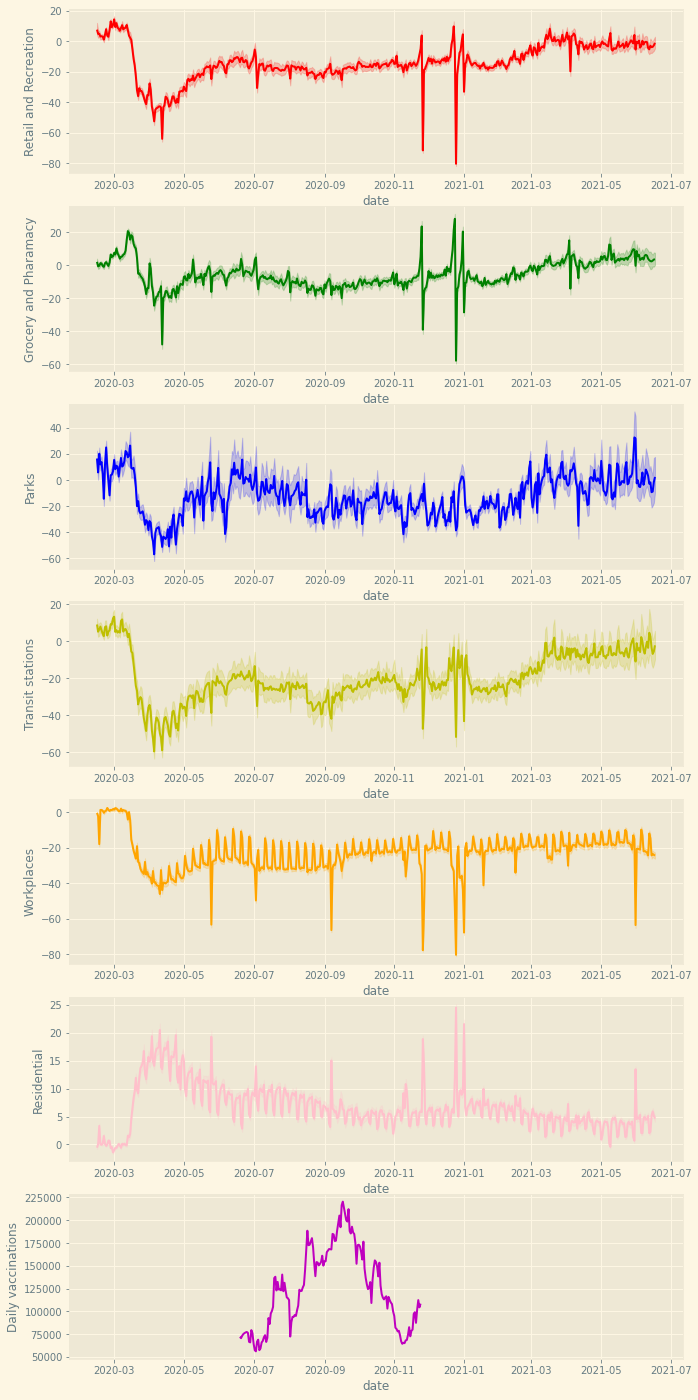

In [ ]:
# TODO Q9
# create visualization

plt.style.use('Solarize_Light2')

x = df_subset['date']
x2 = df_vax_subset['date']
y1 = df_subset['retail_and_recreation_percent_change_from_baseline']
y2 = df_subset['grocery_and_pharmacy_percent_change_from_baseline']
y3 = df_subset['parks_percent_change_from_baseline']
y4 = df_subset['transit_stations_percent_change_from_baseline']
y5 = df_subset['workplaces_percent_change_from_baseline']
y6 = df_subset['residential_percent_change_from_baseline']
y7 = df_vax_subset['daily_vaccinations'] #this particular field helps us understand people's behaviour towards vaccination drive

fig = plt.figure(figsize=(11, 10))

#All fields are percent change from baseline

ax1 = plt.subplot(711)
ax1 = sns.lineplot(x, y1, color='r')
plt.ylabel("Retail and Recreation")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(712, sharex=ax1)
ax2 = sns.lineplot(x, y2, color='g')
plt.ylabel("Grocery and Pharamacy")
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax3 = plt.subplot(713, sharex=ax1)
ax3 = sns.lineplot(x, y3, color='b')
plt.ylabel("Parks")
plt.setp(ax3.get_xticklabels(), fontsize=10)

ax4 = plt.subplot(714, sharex=ax1)
ax4 = sns.lineplot(x, y4, color='y')
plt.ylabel("Transit stations")
plt.setp(ax4.get_xticklabels(), fontsize=10)

ax5 = plt.subplot(715, sharex=ax1)
ax5 = sns.lineplot(x, y5, color='orange')
plt.ylabel("Workplaces")
plt.setp(ax5.get_xticklabels(), fontsize=10)

ax6 = plt.subplot(716, sharex=ax1)
ax6 = sns.lineplot(x, y6, color='pink')
plt.ylabel("Residential")
plt.setp(ax6.get_xticklabels(), fontsize=10)

ax7 = plt.subplot(717, sharex=ax1)
ax7 = sns.lineplot(x2, y7, color='m')
plt.ylabel("Daily vaccinations")
plt.setp(ax7.get_xticklabels(), fontsize=10)

#fig.suptitle("Percentage change from baseline" , fontsize = '10', fontweight = 'bold')
fig.subplots_adjust(top=2)
plt.show()



**TODO** Q10: Answer the following questions:

a) Do the results seem to satisfy “common sense”?

b) Make sure to explain any trends, patterns, or notable anomalies      observed in your mobility data.
    
  **Ans:** 

  The results do seem to satisfy "common sense". I can say this because of a number of reasons by observing different patterns, trends or any anomalies the mobility data holds because of Covid-19. 

  From 11 March 2020 when Coronavirus was officially declared a pandemic we can observed many trends and patterns like:

  * A sudden linear dip from 10% before March 2020 to -60% after 11 March 2020 can be seen in transit stations because of lockdown and only limited and emergency commutes were allowed like grocery, hospital visits.
  * As the transit station graph kept decreasing, the residential graph can be seen increasing simultaneously. A straight 20% increase can be observed in residential graphs from 11 March till end April 2020. And afterwards a systematic pattern can be observed which depends on ease in lockdown, emergency cases, etc.
  * Similarly, we can observe a sudden dip in park visits as the spread of coronavirus increased and a stay at home order was declared. 
  * A sudden dip from 11 March 2020 and then a stable, systematic pattern can be observed in the workplace graph because the majority of the people worked from home and only front line workers were allowed to go to their respective workplaces.

 From Jan 2021 we can see a linear increase in parks, workplace, and transit stations graphs as the restrictions got eased out in Florida. 

 All these points justify why we can observe sudden dips in various graphs and the reason for all this is coronavirus. 


c) Which trends, patterns, or notable anomalies in the mobility data
    are likely related to COVID-19 cases, non-pharmaceutical
    interventions such as stay-at-home orders, or vaccinations?

   **Ans:**
 
 Trends and patterns in the mobility data likely related to Covid-19 cases such as stay at home order, vaccination can be ssen as:

   **Vaccination drive:** The graph for the total number of people getting vaccinated daily does hold some pattern. 
  * We can see initially around 50,000 to 75,000 people received vaccines, and these could be the front line workers who were at higher risk of getting coronavirus.  Gradually the graph started increasing and more people were getting their vaccine shot. On some days not many people went for their shot maybe because people were skeptical about the vaccine and the side effects the vaccines hold. But after a while on 6th Sept 2020 (Labours day) the graph reached its highest mark of 2.2M daily vaccinations. After that the graph gradually started decreasing because now around 50% of the population at least got their first shot. 

**Because of stay at home order imposed,**

  *  We can observe in the residential graph that from 11 March 2020, when coronavirus was officially declared a pandemic we can a sudden increase from 0% to 20% and gradually between 5-10% as the lockdown eased out in the Florida state and people started getting their shot. Similar trend can be seen for the workplace graph as people worked from their home.

  *  Park visitors were also less because of covid and stay at home order but the graph got its peak on public holidays or weekends.

  *  And lastly, a sudden dip from 11 March 2021 and afterwards kind of a stable, similar pattern can be observed in both Retail and Recreation, Grocery and Pharmacy graphs because these include some essential visits like collecting groceries, medicines, newspaper, etc and a constant fluctuating graph till end of November 2020 when lockdown eased out to some extent.

From March 2021, we can see transit stations, workplace, retail and recreation, grocery and pharma, parks to be in an increasing trend because by then covid deaths and cases started decreasing, new cases reported daily were very less in comparison to earlier months therefore lockdown was lifted. People started commuting and going to their workplaces, parks and other activities by following the protocol of social distancing and mask. And therefore, we can observe a decreasing trend in the residential plot. 
 
d) Which trends, patterns, or notable anomalies in the mobility data
    are likely related to other factors?

e) Cite specific evidence from your plot to support your answer.

  **Ans:**  
    
   **Beacuse of Public holidays**

  6th september 2020, Labour Day is a noticeable mark here.  Because of a national holiday people didn't go to their workplaces despite corona restrictions. We can still see a huge dip on this particular day i.e.-65%. People stayed at home on this day so we can also see an increase in the residential and park graphs. And therefore the majority of the people because of a holiday decided to get vaccinated on this particular day in Florida (2.2 million). 

  On 24th December 2020, Christmas eve, we can observe a quite noticeable trend and pattern. We can see around -60% dip in both grocery and pharma, retail and recreation activities. And the highest dip in workplace graph i.e -80%. This could be because December started shaping to be idealist covid month continuing till Jan, 2021. Therefore, we can see the highest peak i.e 25% in the residential graph from 5% .

  1st January 2021, New Year’s eve day is another noticeable mark here. We can see a decrease in the workplace and transit stations graphs because of a holiday. But we can also see an increase in the grocery and pharmacy, retail and recreation and residential graph. This helps us understand people staying at home and celebrating.

  31st March, 2021, Memorial Day therefore we can see a dip in the workplace graph and simultaneous increase in the residential graph. 


  **Seasonal Changes**

  Seasonal changes can also be observed in the graph like during winter season not many park visitors can be observed, people liked to stay in their home, therefore after winter season only we can see Trasit station graph getting its peak and residential graph going down.



**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why their mobility data
might *not* be useful for understanding the effect of COVID-19-related
interventions, or why the data might be misleading.

a) For the U.S. state you have chosen, briefly answer *all* of the
    questions in that checklist, and explain how your answer affects the
    validity of the data.

  **Ans:**

1. **Significant changes from Jan 3 to Feb 6, 2020:** The weather in Florida during this time period is mostly cold therefore park visitors are less though on 15 Feb 2020, park visits increased by a significant number because of Susan B. Anthony Day and Washington’s birthday celebration falling on the same day.

2. **Park visitors change from Jan till now:** Park visitors have increased from January, 2021 to now in Florida. From Jan to March the visitors have increased gradually but the growth isn’t as significant as seen from March to June, this could be because of season transitions i.e winter to spring and summer season when people enjoy the most in the parks. On some days, we can see parks visits were at peak like on 31st March (Memorial Day). 

  From the data from the past year, we can see that park visits dropped as soon as Coronavirus was declared as a worldwide pandemic. This continued till March, 2020 afterwards a continuous rise can be seen in park visitors over the time but it isn’t as significant as 2021 when things got better and the world had a vaccine for coronavirus.  


3. **Time spend in residential area:** 
Before Coronavirus, people didn’t spend much time in the residential area. The graph before March can be seen on peaks on some days, this could be because of weekends or public holidays. Additionally, people spend more time in the residential area in the winter season than in spring or summer season beacuse majority of the tourist visit florida in these seasons only. Therefore, estimates need to be adjusted based upon seasons. 

  Range of jobs in Florida lie from Retail, travel, tourist and food industry because Florida is famous for its tourist attractions and theme parks which makes it a particularly interesting place to live after retirement. 


4. **Mobility changes on weekdays or weekends depending on the type of work:** During Covid time, the travel industry was affected the most especially for Florida, one of the most visited states in the US. Therefore during this time the majority of the working people stayed at home. 

5. **How well is Florida represented:** Florida is represented as good as other states in the USA like California, Texas, etc which are also the most visited states. Google maps does show a variety of options for hotels, beaches and theme parks depending upon proximity, budget, timing depending upon the interest of a visitor. 

  Florida does have some places where cell phones aren’t allowed like military offices, etc. Additionally, Florida issued a law in July 2019 stating using a cell phone while driving will be a punishable offense. 

  **Affect on the validity of data:**
  On analyzing these points we can doubt upon the validity of data for some parameters like public holidays, seasonal changes which affected park vivits a lot. Cell phone connectivity which will affect every domain. Not knowing the number of people of particular age group staying  in Florida and their occupation which fails us to understand the residential graph plot.

b) Based on your answers, do you think there are any serious problems
    associated with using this data for understanding user mobility
    changes due to COVID-19?

 **Ans:** Yes, there are can be some serious problems with this data for understanding user mobiltiy changes due to Covid-19

  1. Some people might have moved to their hometown to stay with their parents from the state where they moved because of work. Because of this, there is a possibility of discrepancy in data for fields like transit stations, parks, workplace.
  2. Limited recognition to some states or regions. I found out that Guam, US Virgin Islands aren't recorded in this dataset.
  3. Some vaccines have one dose(Johnson & Johnson) while some have two doses(Pfizer, Moderna). And this isn't specified in the data, this can interpret the data wrong when people went for their second dose.
  4. Some countries might have mixed 1-dose and 2-dose vaccine while giving data and this can mess the dataset.
  5. Number of people of particular age groups aren't mentioned. Maybe a state has more below 45 age people in comparison to other states. Therefore, a particular state has a low vaccination rate in the starting when vaccine were given to elderly people.
  6.  Seasonal or academic term, public holiday changes aren't mentioned spcifically.
  7.  Transit stations aren't distributed as public or private transport.
  8. We do not know how was lockdown eased out state wise. Some states didn't have much cases therefore there weren't much restrictions imposed.
  9. People opted for home deliveries for grocery, medicines or newspaper and that couldn't be tracked.
  10. Death cases or rate isn't recorded. So, changes in the percentage calculation should be made accordingly, which isn't done.
 

  